<a href="https://colab.research.google.com/github/TerMinator-spec/Object-detector/blob/master/object_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

# New Section

In [ ]:
import os
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [ ]:
!unzip /content/gdrive/MyDrive/household.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/MYNursingHome/walker/01004.jpg  
  inflating: /content/MYNursingHome/walker/01005.jpg  
  inflating: /content/MYNursingHome/walker/01006.jpg  
  inflating: /content/MYNursingHome/walker/01007.jpg  
  inflating: /content/MYNursingHome/walker/01008.jpg  
  inflating: /content/MYNursingHome/walker/01009.jpg  
  inflating: /content/MYNursingHome/walker/01010.jpg  
  inflating: /content/MYNursingHome/walker/01011.jpg  
  inflating: /content/MYNursingHome/walker/01012.jpg  
  inflating: /content/MYNursingHome/walker/01013.jpg  
  inflating: /content/MYNursingHome/walker/01014.jpg  
  inflating: /content/MYNursingHome/walker/01015.jpg  
  inflating: /content/MYNursingHome/walker/01016.jpg  
  inflating: /content/MYNursingHome/walker/01017.jpg  
  inflating: /content/MYNursingHome/walker/01018.jpg  
  inflating: /content/MYNursingHome/walker/01019.jpg  
  inflating: /content/MYNursingHome/walker/01020.jpg  
  inflating: /

In [ ]:
zip_path = "./household.zip"
!cp "{zip_path}" .
!unzip -q household.zip
#!rm cats_dogs.zipyA


cp: './household.zip' and './household.zip' are the same file
replace MYNursingHome/basket_bin/00001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import os
subdirs = [x[0] for x in os.walk('/content/MYNursingHome')]
#print(subdirs)
classes=[]
for i in range(1,len(subdirs)):
  classes.append(subdirs[i][23:])

In [ ]:
classes

['wardrobe',
 'electric_socket',
 'bench',
 'rack',
 'table',
 'water_dispencer',
 'television',
 'handrail',
 'sink',
 'call_bell',
 'bed',
 'toilet_seat',
 'fire_extinguisher',
 'cabinet',
 'basket_bin',
 'refrigerator',
 'walker',
 'cane_stick',
 'shower',
 'door',
 'sofa',
 'wheelchair',
 'human_being',
 'chair',
 'fan']

In [ ]:
import os
import numpy as np
import shutil
import random

# # Creating Train / Val / Test folders (One time use)
root_dir = "/content/MYNursingHome"
root_dir2="/content"
classes_dir = classes

val_ratio = 0.15
test_ratio = 0.05

for cls in classes_dir:
    os.makedirs(root_dir2 +'/train/' + cls)
    os.makedirs(root_dir2 +'/val/' + cls)
    os.makedirs(root_dir2 +'/test/' + cls)


    # Creating partitions of the data after shuffeling
    src = root_dir +"/"+ cls # Folder to copy images from

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                              [int(len(allFileNames)* (1 - val_ratio + test_ratio)), 
                                                               int(len(allFileNames)* (1 - test_ratio))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))
    print('Testing: ', len(test_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir2 +'/train/' + cls)

    for name in val_FileNames:
        shutil.copy(name, root_dir2 +'/val/' + cls)

    for name in test_FileNames:
        shutil.copy(name, root_dir2 +'/test/' + cls)

Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Training:  1350
Validation:  75
Testing:  75
Total images:  1500
Train

In [ ]:
p

fgh


In [ ]:
N_CLASSES=len(classes)
IMG_SIZE=250
import keras
def inception(use_imagenet=True):
    # load pre-trained model graph, don't add final layer
    model = keras.applications.InceptionV3(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                          weights='imagenet' if use_imagenet else None)
    # add global pooling just like in InceptionV3
    
    new_output = keras.layers.GlobalAveragePooling2D()(model.output)
    # add new dense layer for our labels
    new_output = keras.layers.Dense(N_CLASSES, activation='softmax')(new_output)
    model = keras.engine.training.Model(model.inputs, new_output)
    return model

NameError: ignored

In [ ]:
model = inception()
model.summary()


87916544/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 124, 124, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 124, 124, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 124, 124, 32) 0           batch_normalization[0][0]        
_____________________________

In [ ]:
for layer in model.layers:
    layer.trainable = True
    if isinstance(layer, keras.layers.BatchNormalization):
        # we do aggressive exponential smoothing of batch norm
        # parameters to faster adjust to our new dataset
        layer.momentum = 0.9
    
# fix deep layers (fine-tuning only last 50)
for layer in model.layers[:-50]:
    # fix all but batch norm layers, because we neeed to update moving averages for a new dataset!
    if not isinstance(layer, keras.layers.BatchNormalization):
        layer.trainable = False

In [ ]:
model.compile(
    loss='categorical_crossentropy',  # we train 102-way classification
    optimizer=keras.optimizers.Adam(lr=1e-2),  # we can take big lr here because we fixed first layers
    metrics=['accuracy']  # report accuracy during training
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (IMG_SIZE, IMG_SIZE),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/val',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            batch_size = 32,
                                            class_mode = 'categorical')
act_test_set = test_datagen.flow_from_directory('/content/test',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 33750 images belonging to 25 classes.
Found 1875 images belonging to 25 classes.
Found 1875 images belonging to 25 classes.


In [ ]:
STEP_SIZE_TRAIN=training_set.n//32
STEP_SIZE_VALID=test_set.n//32

In [ ]:
model.fit_generator(training_set,
                         steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1054/1054 [==============================] - 886s 806ms/step - loss: 0.5293 - accuracy: 0.8600 - val_loss: 0.1854 - val_accuracy: 0.9526
Epoch 2/10
1054/1054 [==============================] - 823s 781ms/step - loss: 0.1181 - accuracy: 0.9647 - val_loss: 0.0945 - val_accuracy: 0.9704
Epoch 3/10
1054/1054 [==============================] - 809s 768ms/step - loss: 0.0931 - accuracy: 0.9718 - val_loss: 0.0649 - val_accuracy: 0.9811
Epoch 4/10
1054/1054 [==============================] - 784s 744ms/step - loss: 0.0731 - accuracy: 0.9774 - val_loss: 0.0683 - val_accuracy: 0.9774
Epoch 5/10
1054/1054 [==============================] - 796s 756ms/step - loss: 0.0604 - accuracy: 0.9801 - val_loss: 0.0849 - val_accuracy: 0.9768
Epoch 6/10
1054/1054 [==============================] - 774s 734ms/step - loss: 0.0694 - accuracy: 0.9793 - val_loss: 0.0860 - val_accuracy: 0.9784
Epoch 7/10
 818/1054 [======================>.......] - ETA: 2:46 - loss: 0.0517 - accuracy: 0.9838

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/gdrive/MyDrive/model_1.h5')

In [ ]:
from keras.models import load_model

In [ ]:
model=load_model('/content/gdrive/MyDrive/model_1.h5')

In [ ]:
m=model.predict_generator(act_test_set)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
m.shape

(1875, 25)

In [ ]:
pred=model.predict(act_test_set)

In [ ]:
yFit=np.argmax(pred,1)

#post which use the train generator to map the labels 
#back to actual names of the classes 

label_map = (training_set.class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
predictions = [label_map[k] for k in yFit]

In [ ]:
predictions

['table',
 'fan',
 'bench',
 'call_bell',
 'cane_stick',
 'wheelchair',
 'door',
 'rack',
 'door',
 'fan',
 'fire_extinguisher',
 'toilet_seat',
 'chair',
 'bed',
 'wardrobe',
 'toilet_seat',
 'sofa',
 'cane_stick',
 'toilet_seat',
 'table',
 'sofa',
 'electric_socket',
 'rack',
 'shower',
 'sink',
 'bed',
 'basket_bin',
 'rack',
 'door',
 'call_bell',
 'door',
 'rack',
 'rack',
 'chair',
 'sofa',
 'shower',
 'wardrobe',
 'wheelchair',
 'cane_stick',
 'fan',
 'table',
 'electric_socket',
 'toilet_seat',
 'fire_extinguisher',
 'basket_bin',
 'water_dispencer',
 'human_being',
 'refrigerator',
 'rack',
 'fan',
 'rack',
 'bed',
 'basket_bin',
 'chair',
 'cane_stick',
 'shower',
 'television',
 'cabinet',
 'call_bell',
 'television',
 'sofa',
 'call_bell',
 'door',
 'wheelchair',
 'refrigerator',
 'rack',
 'television',
 'basket_bin',
 'door',
 'shower',
 'bench',
 'door',
 'table',
 'fan',
 'television',
 'bench',
 'cabinet',
 'door',
 'basket_bin',
 'sofa',
 'toilet_seat',
 'television',

In [ ]:
testi_datagen = ImageDataGenerator(rescale=1./255)
test_generator = testi_datagen.flow_from_directory(
        "/content/gdrive/MyDrive/testing",
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

Found 17 images belonging to 1 classes.


In [ ]:
pred=model.predict_generator(test_generator, steps=len(test_generator), verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


1/1 [==============================] - 1s 1s/step


In [ ]:
filenames=test_generator.filenames

In [ ]:
filenames

['images/00007.jpg',
 'images/00009.jpg',
 'images/00015.jpg',
 'images/00016.jpg',
 'images/00039.jpg',
 'images/00041.jpg',
 'images/00057.jpg',
 'images/00083.jpg',
 'images/00101.jpg',
 'images/00113.jpg',
 'images/00123.jpg',
 'images/00125.jpg',
 'images/00133.jpg',
 'images/00163.jpg',
 'images/00171.jpg',
 'images/00183.jpg',
 'images/IMG_20210314_162108.jpg']

In [ ]:
pred.shape

(17, 25)

In [ ]:
yFit=np.argmax(pred,1)

#post which use the train generator to map the labels 
#back to actual names of the classes 

label_map = (training_set.class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
predictions = [label_map[k] for k in yFit]

In [ ]:
predictions

['chair',
 'chair',
 'chair',
 'table',
 'chair',
 'chair',
 'basket_bin',
 'basket_bin',
 'basket_bin',
 'cabinet',
 'cabinet',
 'basket_bin',
 'cabinet',
 'basket_bin',
 'chair',
 'cabinet',
 'chair']

In [ ]:
# To show images with names
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

for i in range(len(filenames)):
    print(predictions[i])
    img = load_img('/content/gdrive/MyDrive/testing/'+filenames[i])  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    plt.imshow(img)
    plt.show()
    print('\n')

In [ ]:
training_set.class_indices

{'basket_bin': 0,
 'bed': 1,
 'bench': 2,
 'cabinet': 3,
 'call_bell': 4,
 'cane_stick': 5,
 'chair': 6,
 'door': 7,
 'electric_socket': 8,
 'fan': 9,
 'fire_extinguisher': 10,
 'handrail': 11,
 'human_being': 12,
 'rack': 13,
 'refrigerator': 14,
 'shower': 15,
 'sink': 16,
 'sofa': 17,
 'table': 18,
 'television': 19,
 'toilet_seat': 20,
 'walker': 21,
 'wardrobe': 22,
 'water_dispencer': 23,
 'wheelchair': 24}

In [ ]:
img='/content/gdrive/MyDrive/00001.jpg'

In [ ]:
IMG_SIZE=250
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (IMG_SIZE, IMG_SIZE, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image


In [ ]:
class_indices={'basket_bin': 0,
 'bed': 1,
 'bench': 2,
 'cabinet': 3,
 'call_bell': 4,
 'cane_stick': 5,
 'chair': 6,
 'door': 7,
 'electric_socket': 8,
 'fan': 9,
 'fire_extinguisher': 10,
 'handrail': 11,
 'human_being': 12,
 'rack': 13,
 'refrigerator': 14,
 'shower': 15,
 'sink': 16,
 'sofa': 17,
 'table': 18,
 'television': 19,
 'toilet_seat': 20,
 'walker': 21,
 'wardrobe': 22,
 'water_dispencer': 23,
 'wheelchair': 24}

In [ ]:
# Single prediction
image = load('/content/gdrive/MyDrive/00001.jpg')
x=model.predict(image)
yFit=np.argmax(x,1)

#post which use the train generator to map the labels 
#back to actual names of the classes 

label_map = (class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
predictions = [label_map[k] for k in yFit]

In [ ]:
predictions


['wheelchair']

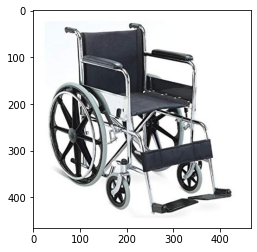

In [ ]:
img = load_img('/content/gdrive/MyDrive/00001.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)